EXAMPLE HOUSE RUSSIA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.shape

(30471, 292)

In [4]:
# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

Missing values

In [5]:
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

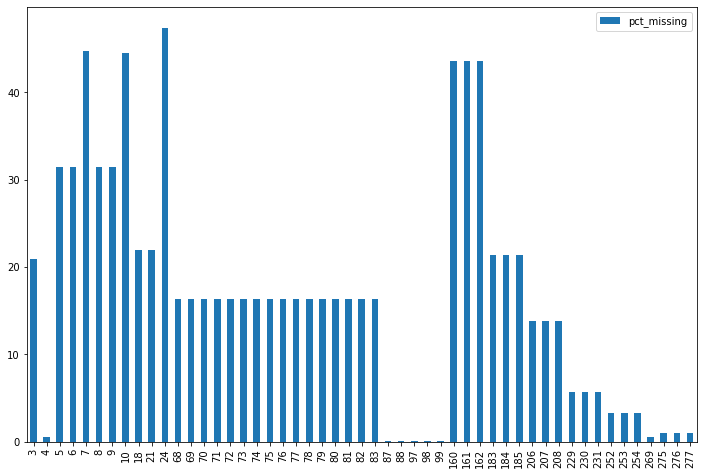

In [6]:
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.show()

Drop observations

In [7]:
less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.5) & (pct_missing_df.pct_missing > 0), 'col'].values)
df.dropna(subset=less_missing_values_cols_list, inplace=True)

In [8]:
df.shape

(30446, 292)

Remove columns (features)

In [9]:
# dropping columns with more than 40% null values
_40_pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 40, 'col'].values)
df.drop(columns=_40_pct_missing_cols_list, inplace=True)

In [10]:
df.shape

(30446, 286)

Impute missing values

In [11]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = df[col].median() #impute with the median
        df[col] = df[col].fillna(med)

In [12]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mod = df[col].describe()['top'] # impute with the most frequently occuring value
        df[col] = df[col].fillna(mod)

In [13]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,2.0,6.0,Investment,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,2.0,6.0,Investment,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,2.0,6.0,Investment,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,2.0,6.0,Investment,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,2.0,6.0,Investment,...,319,108,17,135,236,2,91,195,14,16331452


In [14]:
df.isnull().sum().sum()

0

Outliers

In [15]:
df.life_sq.describe()

count    30446.000000
mean        33.482658
std         46.538609
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

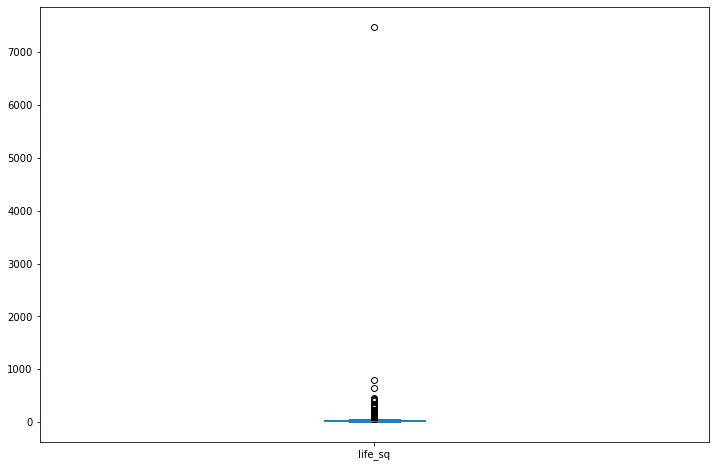

In [16]:
df.life_sq.plot (kind = 'box', figsize = (12, 8)) 
plt.show()#Diem max lon bat thuong

In [17]:
df = df.loc [df.life_sq <7478]

Duplicate records

In [18]:
cols_other_than_id = list(df.columns)[1:]
df.drop_duplicates(subset=cols_other_than_id, inplace=True)

In [19]:
df.shape

(30434, 286)

Fixing data type

In [20]:
df.timestamp.dtype

dtype('O')

In [21]:
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')

In [22]:
df.timestamp.dtype

dtype('<M8[ns]')

EXAMPLE DATA OTHER

In [24]:
import pandas as pd
import numpy as np

In [25]:
#Khoi tao 1 DataFrame
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f','h'],columns=['one', 'two', 'three'])
df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df

,one,two,three
a,-0.635578,0.511935,0.479500
b,NaN,NaN,NaN
c,1.395186,-0.676042,0.109528
d,NaN,NaN,NaN
e,-0.826869,-0.005915,1.318727
f,0.163836,-0.543575,-0.712702
g,NaN,NaN,NaN
h,-0.756378,-1.815119,0.185771


In [26]:
df.isnull().sum()

one      3
two      3
three    3
dtype: int64

In [27]:
df.fillna(0)

,one,two,three
a,-0.635578,0.511935,0.479500
b,0.000000,0.000000,0.000000
c,1.395186,-0.676042,0.109528
d,0.000000,0.000000,0.000000
e,-0.826869,-0.005915,1.318727
f,0.163836,-0.543575,-0.712702
g,0.000000,0.000000,0.000000
h,-0.756378,-1.815119,0.185771


In [29]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f','h'],columns=['one', 'two', 'three'])
df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df.fillna(method='pad')

,one,two,three
a,-0.879589,-0.735127,0.114319
b,-0.879589,-0.735127,0.114319
c,1.707937,-0.297251,-0.206803
d,1.707937,-0.297251,-0.206803
e,-0.043717,-0.609126,-1.033790
f,0.043099,-0.348261,-2.043092
g,0.043099,-0.348261,-2.043092
h,-0.075392,0.890138,-1.241916


In [30]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f','h'],columns=['one', 'two', 'three'])
df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df.dropna()

,one,two,three
a,-1.008231,0.133327,-0.136629
c,0.341443,1.328480,-0.714744
e,-0.052631,-0.664604,0.758810
f,-2.062305,-2.412839,0.763285
h,-1.373739,-0.401993,0.334481


In [31]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'one':[10,20,30,40,50,2000],'two':[1000,0,30,40,50,60]})
df.replace({1000:10,2000:60,0:20})

,one,two
0,10,10
1,20,20
2,30,30
3,40,40
4,50,50
5,60,60
